# Does hours spent on computer usage and tv really affects marks?

In [318]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

# Reading files
marks= pd.read_csv('nas-pupil-marks.csv')
labels= pd.read_csv('nas-labels.csv')

marks.head()

,STUID,State,District,Gender,Age,Category,Same language,Siblings,Handicap,Father edu,...,Express science views,Watch TV,Read magazine,Read a book,Play games,Help in household,Maths %,Reading %,Science %,Social %
0,11011001001,AP,1,1,3,3,1,5,2,1,...,3,3,4,3,4,4,20.37,NaN,27.78,NaN
1,11011001002,AP,1,2,3,4,2,5,2,2,...,3,4,4,3,4,4,12.96,NaN,38.18,NaN
2,11011001003,AP,1,2,3,4,2,5,2,1,...,3,4,3,3,4,4,27.78,70.00,NaN,NaN
3,11011001004,AP,1,2,3,3,2,4,2,1,...,3,4,3,3,4,4,NaN,56.67,NaN,36.00
4,11011001005,AP,1,2,3,3,2,5,2,1,...,3,2,3,3,4,4,NaN,NaN,14.55,8.33


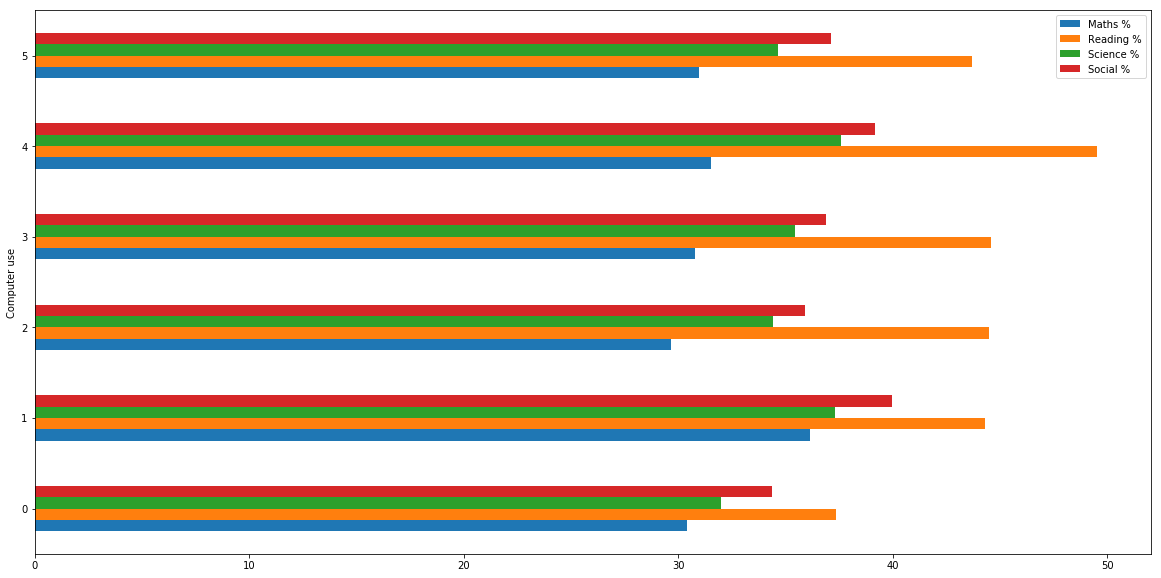

In [317]:
marks[['Computer use','Maths %','Reading %','Science %','Social %']].groupby(['Computer use']).mean()
marks[['Computer use','Maths %','Reading %','Science %','Social %']].groupby(['Computer use']).mean().plot.barh(figsize=(20,10))

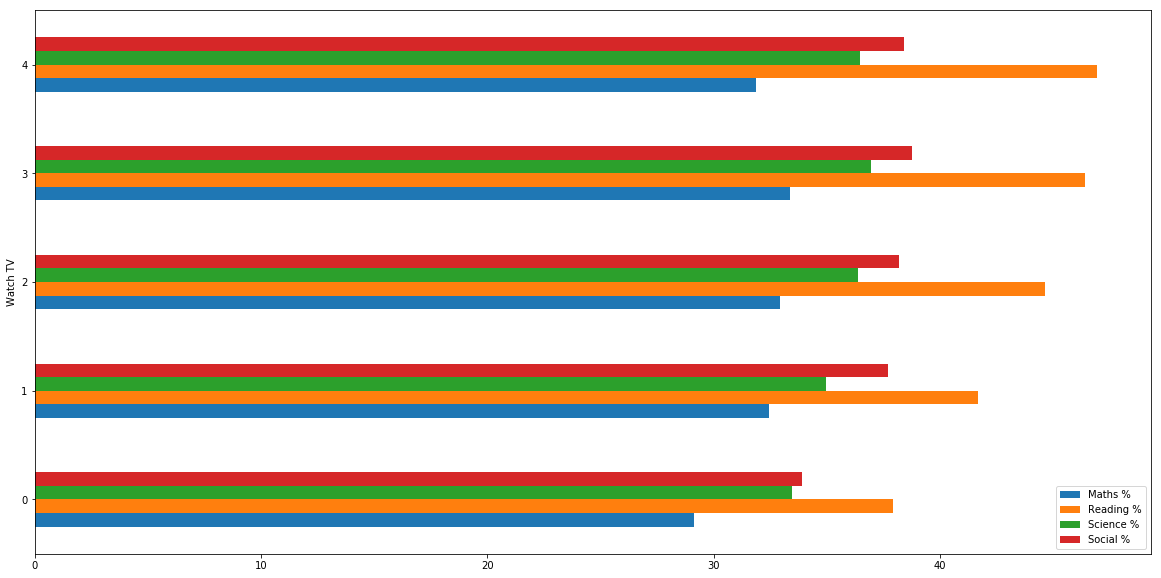

In [316]:
marks[['Watch TV','Maths %','Reading %','Science %','Social %']].groupby(['Watch TV']).mean()
marks[['Watch TV','Maths %','Reading %','Science %','Social %']].groupby(['Watch TV']).mean().plot.barh(figsize=(20,10))

In [319]:
marks_computer=marks[['Computer use','Maths %','Reading %','Science %','Social %']].copy()
marks_computer.head()

,Computer use,Maths %,Reading %,Science %,Social %
0,2,20.37,NaN,27.78,NaN
1,2,12.96,NaN,38.18,NaN
2,2,27.78,70.00,NaN,NaN
3,2,NaN,56.67,NaN,36.00
4,2,NaN,NaN,14.55,8.33


In [303]:
marks_tv=marks[['Watch TV','Maths %','Reading %','Science %','Social %']].copy()
marks_tv.head()

,Watch TV,Maths %,Reading %,Science %,Social %
0,3,20.37,NaN,27.78,NaN
1,4,12.96,NaN,38.18,NaN
2,4,27.78,70.00,NaN,NaN
3,4,NaN,56.67,NaN,36.00
4,2,NaN,NaN,14.55,8.33


# Data Transformation
Since t-test works only on normally distributed data and data available is skewed and does not have a normal distribution.
So we need to transform our data before performing t-test.
Boxcox transformation is the transformation widely used for transforming skewed distribution into a normal distribution

##### For Social - lam=0.56
##### For Reading - lam=0.92
##### For Science - lam=0.58
##### For Maths - lam=0.6

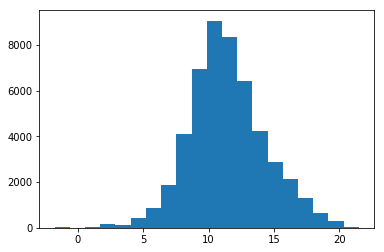

In [320]:
def boxcox(x,lam):
    if lam == 0:
        y = np.log10(x)
    else:
        y = ((x ** lam) - 1.) / lam
    return y

plt.hist(boxcox(Social_cu,0.56),bins=20)
plt.show()

In [320]:
no_computerusage=[1,2]
computer_usage=[3,4,5]

# Performing T-Test

We are going perform t-test for checking whether usage of computer affects marks.

###### Null Hypothesis- Marks of students using computer and Marks of students not using computer are nearly same.
###### Alternate Hypothesis- Marks of students using computer and Marks of students not using computer are not nearly same.
Significance Level- Here significance level will be very low as significance level should be set low if dataset is large and variance is small. - 10^-30

In [321]:
# Testing For Maths
maths_ncu=marks_computer.loc[marks_computer['Computer use'].isin(no_computerusage),'Maths %'].copy()
maths_ncu= maths_ncu.dropna()
maths_cu=marks_computer.loc[marks_computer['Computer use'].isin(computer_usage),'Maths %'].copy()
maths_cu= maths_cu.dropna()

maths_cu=boxcox(maths_cu,0.56).dropna()
maths_ncu=boxcox(maths_ncu,0.56).dropna()

from scipy.stats import ttest_ind
res=ttest_ind(maths_ncu,maths_cu)
if res[1] < 10**(-30):
    if res[0]<0:
        print 'Computer usage improves marks'
    else:
        print 'Computer usage reduces marks'
else:
    print 'Computer usage does not have any effect on marks'

Computer usage reduces marks


In [322]:
# Testing For Science
Science_ncu=marks_computer.loc[marks_computer['Computer use'].isin(no_computerusage),'Science %'].copy()
Science_ncu= Science_ncu.dropna()
Science_cu=marks_computer.loc[marks_computer['Computer use'].isin(computer_usage),'Science %'].copy()
Science_cu= Science_cu.dropna()

Science_cu=boxcox(Science_cu,0.58).dropna()
Science_ncu=boxcox(Science_ncu,0.58).dropna()

from scipy.stats import ttest_ind
res=ttest_ind(Science_ncu,Science_cu)
if res[1] < 10**(-30):
    if res[0]<0:
        print 'Computer usage improves marks'
    else:
        print 'Computer usage reduces marks'
else:
    print 'Computer usage does not have any effect on marks'

Computer usage does not have any effect on marks


In [323]:
# Testing For Social
Social_ncu=marks_computer.loc[marks_computer['Computer use'].isin(no_computerusage),'Social %'].copy()
Social_ncu= Social_ncu.dropna()
Social_cu=marks_computer.loc[marks_computer['Computer use'].isin(computer_usage),'Social %'].copy()
Social_cu= Social_cu.dropna()

Social_cu=boxcox(Social_cu,0.6).dropna()
Social_ncu=boxcox(Social_ncu,0.6).dropna()

from scipy.stats import ttest_ind
res=ttest_ind(Social_ncu,Social_cu)
if res[1] < 10**(-30):
    if res[0]<0:
        print 'Computer usage improves marks'
    else:
        print 'Computer usage reduces marks'
else:
    print 'Computer usage does not have any effect on marks'

Computer usage does not have any effect on marks


In [324]:
# Testing For Reading
Reading_ncu=marks_computer.loc[marks_computer['Computer use'].isin(no_computerusage),'Reading %'].copy()
Reading_ncu= Reading_ncu.dropna()
Reading_cu=marks_computer.loc[marks_computer['Computer use'].isin(computer_usage),'Reading %'].copy()
Reading_cu= Reading_cu.dropna()

Reading_cu=boxcox(Reading_cu,0.92).dropna()
Reading_ncu=boxcox(Reading_ncu,0.92).dropna()

from scipy.stats import ttest_ind
res=ttest_ind(Reading_ncu,Reading_cu)
if res[1] < 10**(-30):
    if res[0]<0:
        print 'Computer usage improves marks'
    else:
        print 'Computer usage reduces marks'
else:
    print 'Computer usage does not have any effect on marks'

Computer usage improves marks


# Watch TV
In this section we will check whether watching TV actually affects marks?
###### Null Hypothesis- Marks of students who watch TV and Marks of students who do not watch TV are nearly same.
###### Alternate Hypothesis- Marks of students who watch TV and Marks of students who do not watch TV are not nearly same.

In [343]:
no_tv=[1]
tv=[2,3,4]

In [412]:
# Testing For Reading
Reading_ntv=marks_tv.loc[marks_tv['Watch TV'].isin(no_tv),'Reading %'].copy()
Reading_ntv= Reading_ntv.dropna()
Reading_tv=marks_tv.loc[marks_tv['Watch TV'].isin(tv),'Reading %'].copy()
Reading_tv= Reading_tv.dropna()

Reading_tv=boxcox(Reading_tv,0.92).dropna()
Reading_ntv=boxcox(Reading_ntv,0.92).dropna()

from scipy.stats import ttest_ind
res=ttest_ind(Reading_ntv,Reading_tv)
if res[1] < 10**(-30):
    if res[0]<0:
        print 'Watching TV improves marks'
    else:
        print 'Watching TV reduces marks'
else:
    print 'Watching TV does not have any effect on marks'

Watching TV improves marks


In [411]:
# Testing For Maths
Maths_ntv=marks_tv.loc[marks_tv['Watch TV'].isin(no_tv),'Maths %'].copy()
Maths_ntv= Maths_ntv.dropna()
Maths_tv=marks_tv.loc[marks_tv['Watch TV'].isin(tv),'Maths %'].copy()
Maths_tv= Maths_tv.dropna()

Maths_tv=boxcox(Maths_tv,0.46).dropna()
Maths_ntv=boxcox(Maths_ntv,0.46).dropna()

from scipy.stats import ttest_ind
res=ttest_ind(Maths_ntv,Maths_tv)
if res[1] < 10**(-30):
    if res[0]<0:
        print 'Watching TV improves marks'
    else:
        print 'Watching TV reduces marks'
else:
    print 'Watching TV does not have any effect on marks'

Watching TV does not have any effect on marks


In [410]:
# Testing For Science
Science_ntv=marks_tv.loc[marks_tv['Watch TV'].isin(no_tv),'Science %'].copy()
Science_ntv= Science_ntv.dropna()
Science_tv=marks_tv.loc[marks_tv['Watch TV'].isin(tv),'Science %'].copy()
Science_tv= Science_tv.dropna()

Science_tv=boxcox(Science_tv,1.12).dropna()
Science_ntv=boxcox(Science_ntv,1.12).dropna()

from scipy.stats import ttest_ind
res=ttest_ind(Science_ntv,Science_tv)
if res[1] < 10**(-30):
    if res[0]<0:
        print 'Watching TV improves marks'
    else:
        print 'Watching TV reduces marks'
else:
    print 'Watching TV does not have any effect on marks'

Watching TV does not have any effect on marks


In [409]:
# Testing For Social
Social_ntv=marks_tv.loc[marks_tv['Watch TV'].isin(no_tv),'Social %'].copy()
Social_ntv= Social_ntv.dropna()
Social_tv=marks_tv.loc[marks_tv['Watch TV'].isin(tv),'Social %'].copy()
Social_tv= Social_tv.dropna()

Social_tv=boxcox(Social_tv,1.2).dropna()
Social_ntv=boxcox(Social_ntv,1.2).dropna()

from scipy.stats import ttest_ind
res=ttest_ind(Social_ntv,Social_tv)
if res[1] < 10**(-30):
    if res[0]<0:
        print 'Watching TV improves marks'
    else:
        print 'Watching TV reduces marks'
else:
    print 'Watching TV does not have any effect on marks'

Watching TV does not have any effect on marks
